# 1. Import and Install Dependencies

In [10]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [11]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [12]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [13]:
def mediapipe_detection(image, model) :
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Color conversion
    image.flags.writeable = False                  #Image is no longer writable 
    results = model.process(image)                 #make prediction
    image.flags.writeable = True                   #Image is writable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #Color conversion back
    return image, results

In [14]:
def draw_landmarks(image, results) : 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [15]:
def draw_styled_landmarks(image, results) : 
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

In [16]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
draw_landmarks(frame, results)

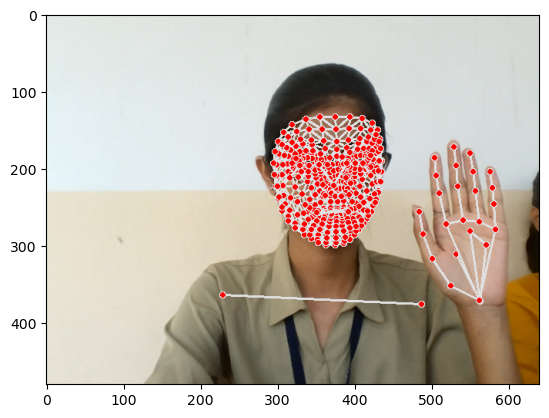

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
def extract_keypoints(results) : 
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
extract_keypoints(results).shape

(1662,)

In [22]:
results.face_landmarks

landmark {
  x: 0.5982878804206848
  y: 0.6401881575584412
  z: -0.018645036965608597
}
landmark {
  x: 0.6010084748268127
  y: 0.6092519164085388
  z: -0.036166947335004807
}
landmark {
  x: 0.5980173349380493
  y: 0.6191539168357849
  z: -0.018590597435832024
}
landmark {
  x: 0.5919812321662903
  y: 0.5757563710212708
  z: -0.028711453080177307
}
landmark {
  x: 0.6011198163032532
  y: 0.5988118648529053
  z: -0.03871312364935875
}
landmark {
  x: 0.5998870134353638
  y: 0.5849823355674744
  z: -0.03617848455905914
}
landmark {
  x: 0.5954852104187012
  y: 0.5515086054801941
  z: -0.01802750490605831
}
landmark {
  x: 0.5369236469268799
  y: 0.5547446608543396
  z: -7.535067561548203e-05
}
landmark {
  x: 0.5935084223747253
  y: 0.5235017538070679
  z: -0.013456709682941437
}
landmark {
  x: 0.5932687520980835
  y: 0.5088702440261841
  z: -0.015204277820885181
}
landmark {
  x: 0.5908916592597961
  y: 0.46079060435295105
  z: -0.009470609948039055
}
landmark {
  x: 0.598181009292602

# 4. Setup Folders for Collection

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'You`r Welcome'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [24]:
for action in actions : 
    for sequence in range(no_sequences) : 
        try : 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except : 
            pass

# 5. Collect Keypoint Values for Training and Testing

In [102]:
# cap = cv2.VideoCapture(0)
# with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic : 
#     #Loop through actions 
#     for action in actions :
#         #Loop through the collection of frames
#         for sequence in range(no_sequences) : 
            
#             #Loop through each frame
#             for frame_num in range(sequence_length) : 
                
#                 #Reading frames
#                 ret, frame = cap.read()

#                 #Make detection 
#                 image, results = mediapipe_detection(frame, holistic)
#                 draw_styled_landmarks(image, results)
#                 #print(results)
                
                
#                 #collecting images 
                
#                 if frame_num == 0 : 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 1, cv2.LINE_AA)
#                     cv2.putText(image, f'Collecting frames for {action} video number {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 4, cv2.LINE_AA)
# #                     cv2.waitKey(2000)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(2000)
#                 else : 
#                     cv2.putText(image, f'Collecting frames for {action} video number {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                
#                 #show to screen
#                 cv2.imshow('OpenCV Feed', image)
                
#                 #Saving the arrays
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 #break 
#                 if cv2.waitKey(10) & 0xFF == ord('q') : 
#                     break

#     cap.release()
#     cv2.destroyAllWindows()

In [103]:
# cap.release()
# cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'You`r Welcome': 2}

In [28]:
#combining all sequences 

sequences = []
labels = []
for action in actions : 
    for sequence in range(no_sequences) : 
        window = []
        for frame_num in range(sequence_length) : 
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), f'{str(frame_num)}.npy'))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [49]:
np.array(sequences).shape

(90, 30, 1662)

In [50]:
np.array(labels).shape

(90,)

In [29]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [30]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 7. Build and Train LSTM Neural Network

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [55]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [58]:
model.fit(X_train, y_train, epochs=245, callbacks=[tb_callback])

Epoch 1/245
3/3 [==============================] - 7s 86ms/step - loss: 1.4858 - categorical_accuracy: 0.1944
Epoch 2/245
3/3 [==============================] - 0s 87ms/step - loss: 1.0850 - categorical_accuracy: 0.4861
Epoch 3/245
3/3 [==============================] - 0s 81ms/step - loss: 18.5626 - categorical_accuracy: 0.4583
Epoch 4/245
3/3 [==============================] - 0s 89ms/step - loss: 2.0997 - categorical_accuracy: 0.2361
Epoch 5/245
3/3 [==============================] - 0s 83ms/step - loss: 2.0357 - categorical_accuracy: 0.3472
Epoch 6/245
3/3 [==============================] - 0s 85ms/step - loss: 1.4392 - categorical_accuracy: 0.4306
Epoch 7/245
3/3 [==============================] - 0s 83ms/step - loss: 0.9240 - categorical_accuracy: 0.4861
Epoch 8/245
3/3 [==============================] - 0s 84ms/step - loss: 1.8485 - categorical_accuracy: 0.5139
Epoch 9/245
3/3 [==============================] - 0s 81ms/step - loss: 7.7645 - categorical_accuracy: 0.3889
Epoch 10/

3/3 [==============================] - 0s 76ms/step - loss: 0.4586 - categorical_accuracy: 0.6806
Epoch 75/245
3/3 [==============================] - 0s 80ms/step - loss: 0.4573 - categorical_accuracy: 0.6944
Epoch 76/245
3/3 [==============================] - 0s 76ms/step - loss: 0.4260 - categorical_accuracy: 0.7083
Epoch 77/245
3/3 [==============================] - 0s 88ms/step - loss: 0.4826 - categorical_accuracy: 0.8472
Epoch 78/245
3/3 [==============================] - 0s 103ms/step - loss: 0.4797 - categorical_accuracy: 0.7083
Epoch 79/245
3/3 [==============================] - 0s 75ms/step - loss: 0.5626 - categorical_accuracy: 0.6806
Epoch 80/245
3/3 [==============================] - 0s 81ms/step - loss: 0.4307 - categorical_accuracy: 0.7361
Epoch 81/245
3/3 [==============================] - 0s 79ms/step - loss: 0.4491 - categorical_accuracy: 0.7500
Epoch 82/245
3/3 [==============================] - 0s 75ms/step - loss: 0.4196 - categorical_accuracy: 0.7083
Epoch 83/245


3/3 [==============================] - 0s 85ms/step - loss: 0.0230 - categorical_accuracy: 1.0000
Epoch 148/245
3/3 [==============================] - 0s 93ms/step - loss: 0.0222 - categorical_accuracy: 1.0000
Epoch 149/245
3/3 [==============================] - 0s 75ms/step - loss: 0.0214 - categorical_accuracy: 1.0000
Epoch 150/245
3/3 [==============================] - 0s 85ms/step - loss: 0.0187 - categorical_accuracy: 1.0000
Epoch 151/245
3/3 [==============================] - 0s 84ms/step - loss: 0.0169 - categorical_accuracy: 1.0000
Epoch 152/245
3/3 [==============================] - 0s 95ms/step - loss: 0.0160 - categorical_accuracy: 1.0000
Epoch 153/245
3/3 [==============================] - 0s 83ms/step - loss: 0.0136 - categorical_accuracy: 1.0000
Epoch 154/245
3/3 [==============================] - 0s 88ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 155/245
3/3 [==============================] - 0s 96ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 

3/3 [==============================] - 0s 89ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 221/245
3/3 [==============================] - 0s 75ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 222/245
3/3 [==============================] - 0s 89ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 223/245
3/3 [==============================] - 0s 100ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 224/245
3/3 [==============================] - 0s 91ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 225/245
3/3 [==============================] - 0s 85ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 226/245
3/3 [==============================] - 0s 76ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 227/245
3/3 [==============================] - 0s 80ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 228/245
3/3 [==============================] - 0s 69ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [60]:
res = model.predict(X_test)

1/1 [==============================] - 0s 490ms/step


In [61]:
actions[np.argmax(res[2])]

'You`r Welcome'

In [62]:
actions[np.argmax(y_test[2])]

'You`r Welcome'

# 9. Save Weights

In [63]:
model.save('action.h5')

In [64]:
# del model

In [65]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [66]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [67]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 50ms/step


In [68]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [69]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  1],
        [ 0,  7]],

       [[13,  0],
        [ 0,  5]],

       [[12,  0],
        [ 1,  5]]], dtype=int64)

In [70]:
accuracy_score(ytrue, yhat)

0.9444444444444444

# 11. Test in Real Time

In [71]:
from scipy import stats

In [72]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [73]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 11ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'media